In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation,
    Add, MaxPooling2D, GlobalAveragePooling2D,
    Dense, Dropout 
)
from tensorflow.keras.applications import ResNet50, Xception, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import random
from PIL import Image
import os
import shutil

In [3]:
input_path = '/kaggle/input/facescrub-full'
print("محتويات المجلد:", os.listdir(input_path))

محتويات المجلد: ['actress_faces', 'actor_faces']


In [4]:
# نسخ الصور للستات

actress_dir = '/kaggle/input/facescrub-full/actress_faces'
merged_faces_path = "/kaggle/working/merged_faces"  # مسار المجلد الجديد

# إنشاء المجلد "merged_faces" إذا لم يكن موجودًا
if not os.path.exists(merged_faces_path):
    os.makedirs(merged_faces_path)
def copy_images(src_dir, target_dir):
    for folder_name in os.listdir(src_dir):
        folder_path = os.path.join(src_dir, folder_name)
        if os.path.isdir(folder_path):
            # هنعمل فايل نضيف فيه الصور
            target_folder = os.path.join(target_dir, folder_name)
            os.makedirs(target_folder, exist_ok=True)
            
            # نسخ الصور من المجلد الأصلي للجديد
            for img_name in os.listdir(folder_path):
                src_img_path = os.path.join(folder_path, img_name)
                target_img_path = os.path.join(target_folder, img_name)
                shutil.copy(src_img_path, target_img_path)

copy_images(actress_dir, merged_faces_path)

print("تم إضافة صور الممثلات بنجاح.")

تم إضافة صور الممثلات بنجاح.


In [5]:
actor_names ="/kaggle/input/facescrub-full/actor_faces"
copy_images(actor_names, merged_faces_path)
print("تم إضافة صور الممثلين يعم بنجاح.")

تم إضافة صور الممثلين يعم بنجاح.


In [9]:
# outbut_file='/kaggle/working/merged_faces'
# os.listdir(outbut_file)

In [4]:
data_path = "/kaggle/input/facescrub-full/actress_faces"

# عرض الصور
def display_images(path, num_images=10):
    image_files = []
    
    # قراءة كل الصور في الفايل و إضافتها لقائمة الصور
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        if os.path.isfile(img_path) and img.endswith(('.jpeg', '.jpg', '.png')):
            image_files.append(img_path)

    # عشوائيات
    random.shuffle(image_files)
    
    # عرض الصور
    for i, img_path in enumerate(image_files[:num_images]):
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# عرض الأسماء 
print("First 5 Image Names:")
image_files = os.listdir(data_path)
print(image_files[:10])

display_images(data_path)


First 5 Image Names:
['Courteney_Cox', 'Farah_Fath', 'Tina_Louise', 'Fran_Drescher', 'Melissa_Gilbert', 'Lisa_LoCicero', 'Dianna_Agron', 'Sharon_Gless', 'Shannon_Kane', 'Geena_Davis']


In [5]:
class_counts = {}
for class_name in os.listdir(data_path):
    class_dir = os.path.join(data_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

# ترتيب الكلاسات بناءً على عدد الصور واختيار أعلى 50
top_classes = sorted(class_counts, key=class_counts.get, reverse=True)[:50]
print(f"Top 50 classes: {top_classes}")


Top 50 classes: ['Kristin_Chenoweth', 'America_Ferrera', 'Felicity_Huffman', 'Holly_Marie_Combs', 'Fran_Drescher', 'Geena_Davis', 'Debra_Messing', 'Courteney_Cox', 'Julie_Benz', 'Neve_Campbell', 'Glenn_Close', 'Christina_Applegate', 'Tina_Fey', 'Julianna_Margulies', 'Christa_Miller', 'Julia_Louis-Dreyfus', 'Miranda_Cosgrove', 'Sarah_Michelle_Gellar', 'Dianna_Agron', 'Jessica_Capshaw', 'Eva_Longoria', 'Joan_Collins', 'Kim_Cattrall', 'Lisa_Kudrow', 'Sarah_Hyland', 'Victoria_Justice', 'Marcia_Cross', 'Gillian_Anderson', 'Roma_Downey', 'Summer_Glau', 'Lea_Michele', 'Helen_Hunt', 'Roseanne_Barr', 'Allison_Janney', 'Julie_Bowen', 'Kirstie_Alley', 'Alyssa_Milano', 'Jennette_McCurdy', 'Lori_Loughlin', 'Patricia_Arquette', 'Candace_Cameron_Bure', 'Cheryl_Hines', 'Candice_Bergen', 'Lacey_Chabert', 'Heather_Locklear', 'Jane_Lynch', 'Sarah_Drew', 'Susan_Lucci', 'Stana_Katic', 'Eliza_Coupe']


In [6]:
# إنشاء دلائل جديدة للكلاسات المختارة
filtered_data_path = "/kaggle/working/filtered_faces"
os.makedirs(filtered_data_path, exist_ok=True)

for class_name in top_classes:
    class_dir = os.path.join(data_path, class_name)
    target_dir = os.path.join(filtered_data_path, class_name)
    os.makedirs(target_dir, exist_ok=True)
    
    # نسخ الصور
    for img_name in os.listdir(class_dir):
        src_path = os.path.join(class_dir, img_name)
        dest_path = os.path.join(target_dir, img_name)
        os.symlink(src_path, dest_path)  # استخدام رابط رمزي لتوفير الوقت والمساحة


In [7]:

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,   # تحريك الصورة أفقي
    height_shift_range=0.2,  # تحريك الصورة عمودي
    shear_range=0.2,         # تشويه القص
    brightness_range=[0.8, 1.2],  # تغيير سطوع الصورة
    horizontal_flip=True,
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    filtered_data_path,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='training'  
)
val_generator = train_datagen.flow_from_directory(
    filtered_data_path,
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='validation' ,
    shuffle=True
)

Found 4605 images belonging to 50 classes.
Found 1125 images belonging to 50 classes.


In [8]:
np.unique(val_generator.classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)

In [9]:
from collections import Counter

# عد القيم داخل val_generator.classes
class_counts = Counter(val_generator.classes)
class_counts

Counter({2: 29,
         31: 29,
         13: 27,
         9: 26,
         14: 26,
         15: 26,
         20: 26,
         7: 25,
         8: 25,
         17: 25,
         27: 25,
         38: 25,
         48: 25,
         6: 24,
         26: 24,
         10: 23,
         12: 23,
         23: 23,
         24: 23,
         25: 23,
         37: 23,
         44: 23,
         29: 22,
         34: 22,
         36: 22,
         43: 22,
         49: 22,
         0: 21,
         1: 21,
         16: 21,
         19: 21,
         28: 21,
         30: 21,
         33: 21,
         40: 21,
         41: 21,
         46: 21,
         3: 20,
         4: 20,
         5: 20,
         18: 20,
         21: 20,
         22: 20,
         32: 20,
         35: 20,
         39: 20,
         42: 20,
         11: 19,
         45: 19,
         47: 19})

In [63]:
# import hashlib

# def get_file_hash(file_path):
#     hash_algo = hashlib.md5()
#     with open(file_path, 'rb') as f:
#         hash_algo.update(f.read())
#     return hash_algo.hexdigest()

# def remove_duplicates(target_dir):
#     file_hashes = set()
#     for folder_name in os.listdir(target_dir):
#         folder_path = os.path.join(target_dir, folder_name)
#         if os.path.isdir(folder_path):
#             for img_name in os.listdir(folder_path):
#                 img_path = os.path.join(folder_path, img_name)
#                 file_hash = get_file_hash(img_path)
#                 if file_hash in file_hashes:
#                     os.remove(img_path)
#                 else:
#                     file_hashes.add(file_hash)


In [38]:
# print("عرض هيكل المجلد النهائي:")
# for root, dirs, files in os.walk(merged_faces_path):
#     level = root.replace(merged_faces_path, '').count(os.sep)
#     indent = ' ' * 4 * (level)
#     print(f"{indent}{os.path.basename(root)}/")
#     subindent = ' ' * 4 * (level + 1)
#     for f in files:
#         print(f"{subindent}{f}")

In [10]:
class_counts = {}
for class_name in os.listdir(filtered_data_path):
    class_path = os.path.join(filtered_data_path, class_name)
    if os.path.isdir(class_path):  
        image_count = len(os.listdir(class_path)) 
        class_counts[class_name] = image_count

# عرض النتائج
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

# إجمالي عدد الصور
total_images = sum(class_counts.values())
print(f"\nTotal images: {total_images}")


Class 'Holly_Marie_Combs' has 133 images.
Class 'Felicity_Huffman' has 136 images.
Class 'Kim_Cattrall' has 114 images.
Class 'Julia_Louis-Dreyfus' has 119 images.
Class 'Jennette_McCurdy' has 104 images.
Class 'Christina_Applegate' has 126 images.
Class 'Lisa_Kudrow' has 114 images.
Class 'Gillian_Anderson' has 109 images.
Class 'Roseanne_Barr' has 106 images.
Class 'Lori_Loughlin' has 104 images.
Class 'Jane_Lynch' has 101 images.
Class 'Helen_Hunt' has 107 images.
Class 'Julianna_Margulies' has 121 images.
Class 'Debra_Messing' has 130 images.
Class 'Neve_Campbell' has 128 images.
Class 'Geena_Davis' has 131 images.
Class 'Lea_Michele' has 107 images.
Class 'Joan_Collins' has 116 images.
Class 'Tina_Fey' has 125 images.
Class 'Kirstie_Alley' has 105 images.
Class 'Marcia_Cross' has 110 images.
Class 'Kristin_Chenoweth' has 148 images.
Class 'Sarah_Drew' has 100 images.
Class 'Eliza_Coupe' has 98 images.
Class 'Fran_Drescher' has 132 images.
Class 'Lacey_Chabert' has 102 images.
Clas

In [20]:
def resnet_block(x, filters, strides=1):
    shortcut = x
    # الطبقة الأولى
    x = Conv2D(filters, (3, 3), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # الطبقة الثانية
    x = Conv2D(filters, (3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    # تعديل أبعاد المدخلات
    if strides != 1:
        shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 512, strides=2)
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

resnet_model = build_resnet((128, 128, 3), len(train_generator.class_indices))
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in xception_base.layers[:-20]:  # قم بتجميد الطبقات الأولى فقط
    layer.trainable = False

# إضافة الطبقات النهائية
x = xception_base.output
x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
xception_predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

xception_model = Model(inputs=xception_base.input, outputs=xception_predictions)
xception_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [11]:
# DenseNet
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


for layer in densenet_base.layers[:-20]:  
    layer.trainable = False

x = densenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
densenet_predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

densenet_model = Model(inputs=densenet_base.input, outputs=densenet_predictions)
densenet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [23]:
print("Training Xception...")
xception_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

# تقييم 
xception_loss, xception_acc = xception_model.evaluate(val_generator)
print(f"Xception Accuracy: {xception_acc:.2f}")


Training Xception...
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.1071 - loss: 3.5970
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 268us/step - accuracy: 0.4062 - loss: 2.2141
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.5027 - loss: 1.7924
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 102us/step - accuracy: 0.5625 - loss: 1.4768
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.6900 - loss: 1.1027
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 126us/step - accuracy: 0.7812 - loss: 0.9238
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.7363 - loss: 0.8890
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 117us/step - accuracy: 0.8125 - loss: 0.7243
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.8187 - loss: 0.6241
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 106us/step - accuracy: 0.7031 - loss: 0.9818
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6360 - loss: 1.4757
Xception Accuracy: 0.64


In [61]:
xception_model.save('/kaggle/working/xception_model.h5')

In [34]:
# from tensorflow.keras.models import load_model
# xception_model = load_model('/kaggle/working/xception_model.h5')
# print("ضن")
# xception_model

In [25]:
len(val_generator)

18

In [73]:
all_imgs = []
all_labels = []

for i in range(len(val_generator)):
    imgs, labels = next(val_generator)
    all_imgs.append(imgs)
    all_labels.append(labels)

# تحويل القوائم إلى مصفوفات
all_imgs = np.vstack(all_imgs)
all_labels = np.vstack(all_labels)

# التنبؤ بكل الصور دفعة واحدة
y_pred = xception_model.predict(all_imgs)

# تحويل التنبؤات إلى الفئات
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(all_labels, axis=1)

# عرض النتائج
print("Predicted Classes:", y_pred_classes[:10])
print("True Classes:", y_true_classes[:10])

36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 705ms/step
Predicted Classes: [21 49 32  3 28 43  4 46  4  7]
True Classes: [21 37 32  3 28 43  4 46 18 15]


In [37]:
# for true_label, pred_label in zip(y_true_classes, y_pred_classes):
#     print(f"True: {true_label}, Predicted: {pred_label}")


In [74]:
xception_accuracy = accuracy_score(y_true_classes,y_pred_classes)
print(f"Xception Accuracy: {xception_accuracy:.2f}")

Xception Accuracy: 0.64


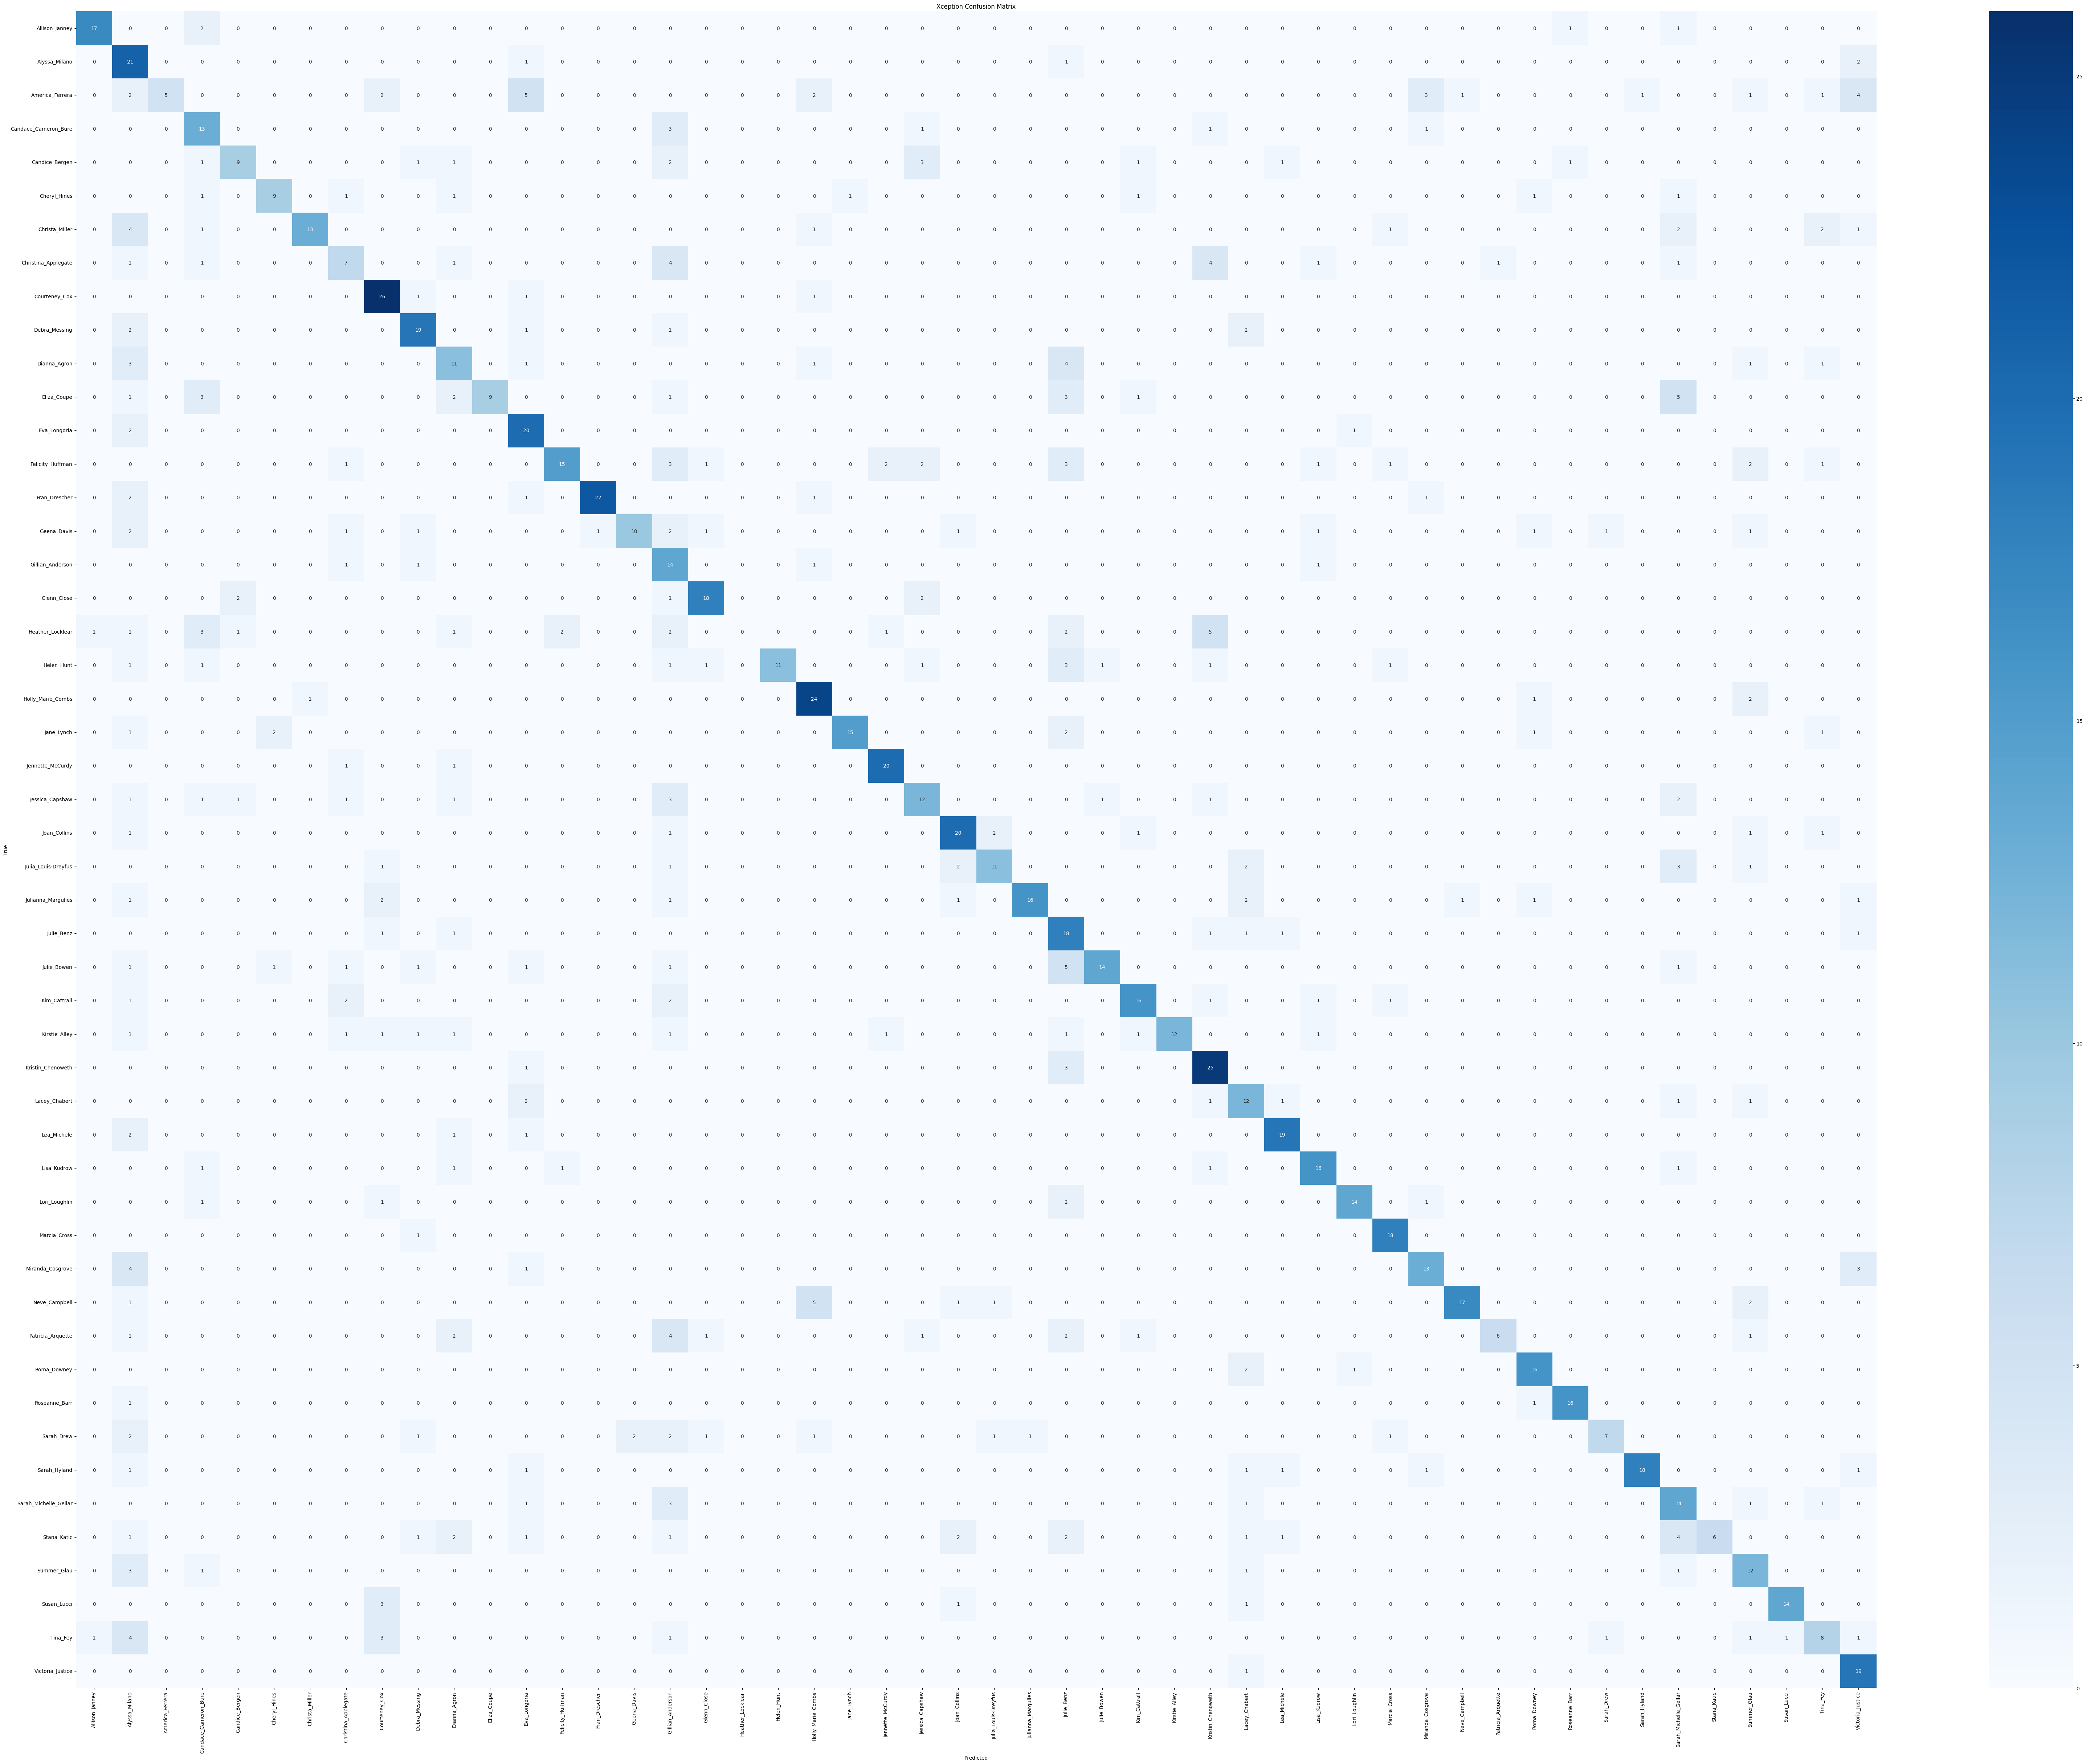

In [75]:
xception_cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(80, 60))
sns.heatmap(xception_cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title("Xception Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [76]:
xception_classification_report = classification_report(y_true_classes, y_pred_classes, target_names=val_generator.class_indices.keys())
print("Xception Classification Report:\n", xception_classification_report)

Xception Classification Report:
                        precision    recall  f1-score   support

       Allison_Janney       0.89      0.81      0.85        21
        Alyssa_Milano       0.30      0.84      0.45        25
      America_Ferrera       1.00      0.19      0.31        27
 Candace_Cameron_Bure       0.43      0.68      0.53        19
       Candice_Bergen       0.69      0.45      0.55        20
         Cheryl_Hines       0.75      0.56      0.64        16
       Christa_Miller       0.93      0.52      0.67        25
  Christina_Applegate       0.41      0.33      0.37        21
        Courteney_Cox       0.65      0.90      0.75        29
        Debra_Messing       0.68      0.76      0.72        25
         Dianna_Agron       0.41      0.50      0.45        22
          Eliza_Coupe       1.00      0.36      0.53        25
         Eva_Longoria       0.51      0.87      0.65        23
     Felicity_Huffman       0.83      0.47      0.60        32
        Fran_Drescher

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
from sklearn.metrics import classification_report

# تحويل التقرير إلى dictionary باستخدام output_dict=True
xception_classification_report_dic = classification_report(y_true_classes, y_pred_classes, target_names=val_generator.class_indices.keys(), output_dict=True)

# حساب المتوسطات:
precision_avg = xception_classification_report_dic['accuracy']  # لو كنت عايز تشوف ال accuracy
recall_avg = xception_classification_report_dic['macro avg']['recall']  # المتوسط للموديل لكل الفئات لل recall
f1_avg = xception_classification_report_dic['macro avg']['f1-score']  # المتوسط للموديل لكل الفئات لل f1-score

print("Macro Average Recall:", recall_avg)
print("Macro Average Precision:", precision_avg)
print("Macro Average F1-Score:", f1_avg)


Macro Average Recall: 0.6353369633527902
Macro Average Precision: 0.6373333333333333
Macro Average F1-Score: 0.6321643907861125


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, F1-Score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("Xception Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Xception Metrics:
Precision: 0.72
Recall: 0.64
F1-Score: 0.64


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


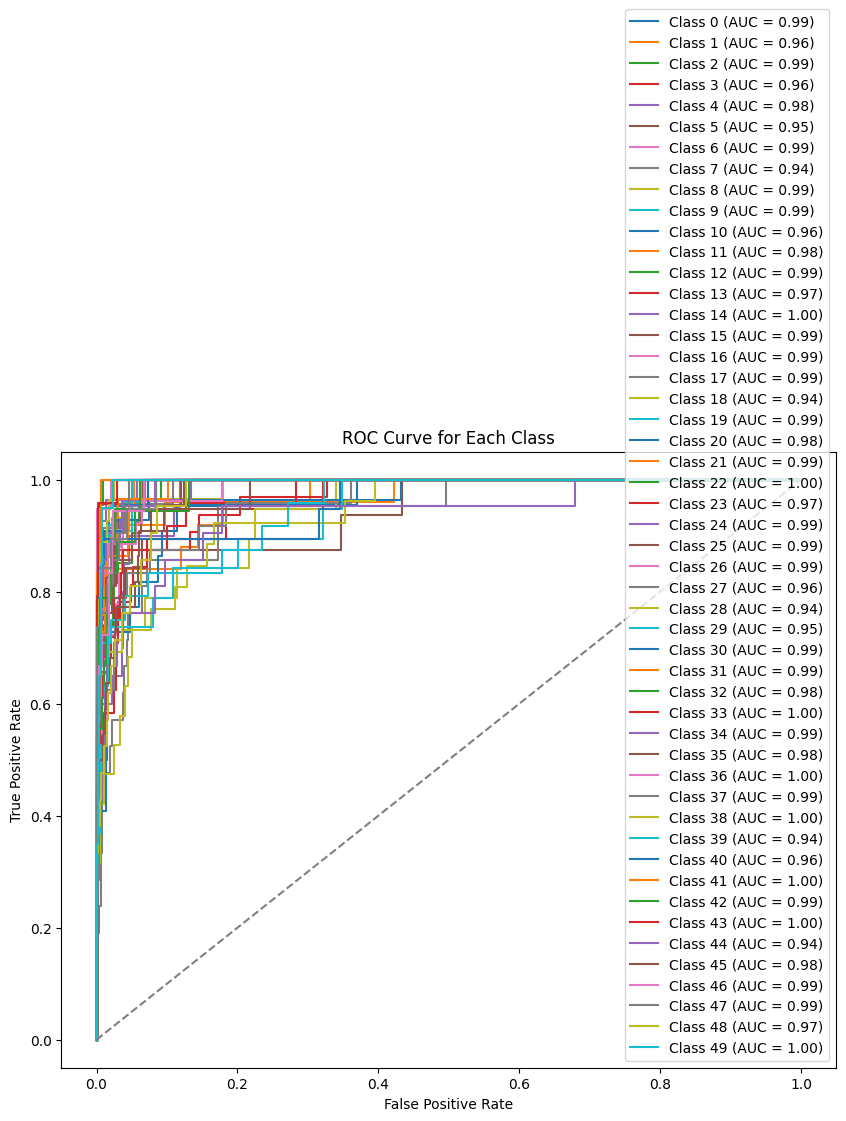

In [79]:
from sklearn.preprocessing import label_binarize

n_classes = all_labels.shape[1]  # number of classes
y_true_bin = label_binarize(y_true_classes, classes=np.arange(n_classes))
y_pred_bin = y_pred  # The raw prediction probabilities

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plotting each class ROC curve
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random classifier (diagonal)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customizing the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')

# Show the plot
plt.show()

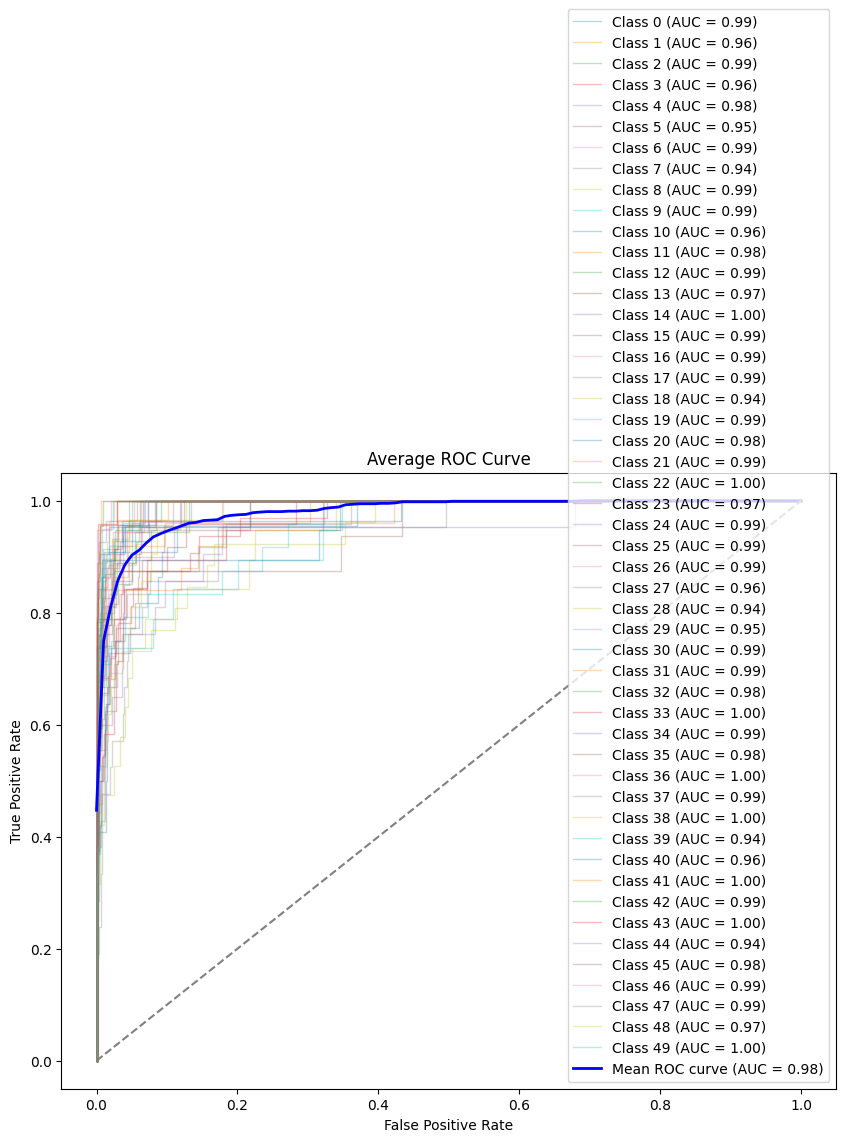

In [80]:
n_classes = all_labels.shape[1]  # number of classes
y_true_bin = label_binarize(y_true_classes, classes=np.arange(n_classes))
y_pred_bin = y_pred  # The raw prediction probabilities

fpr_all = []
tpr_all = []
roc_auc_all = []

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    fpr_all.append(fpr)
    tpr_all.append(tpr)
    roc_auc_all.append(roc_auc)

# Calculate the mean ROC curve
# First, interpolate the TPR at common FPR points
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(mean_fpr, fpr_all[i], tpr_all[i])

mean_tpr /= n_classes

# Calculate the AUC for the average ROC curve
mean_roc_auc = auc(mean_fpr, mean_tpr)

# Plotting the ROC curves for each class and the average curve
plt.figure(figsize=(10, 8))

# Plot the individual class ROC curves
for i in range(n_classes):
    plt.plot(fpr_all[i], tpr_all[i], lw=1, alpha=0.3, label=f'Class {i} (AUC = {roc_auc_all[i]:.2f})')

# Plot the average ROC curve
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC curve (AUC = {mean_roc_auc:.2f})', lw=2)

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customizing the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [63]:
print("Training ResNet...")
resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

# تقييم ResNet
resnet_loss, resnet_acc = resnet_model.evaluate(val_generator)
print(f"ResNet Accuracy: {resnet_acc:.2f}")


Training ResNet...
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 301s 4s/step - accuracy: 0.0321 - loss: 8.9223
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 189us/step - accuracy: 0.0938 - loss: 3.7024
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 294s 4s/step - accuracy: 0.0655 - loss: 3.7878
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 124us/step - accuracy: 0.1250 - loss: 3.4999
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step - accuracy: 0.1028 - loss: 3.4951
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 89us/step - accuracy: 0.1406 - loss: 3.6908
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step - accuracy: 0.1114 - loss: 3.4025
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 95us/step - accuracy: 0.1875 - loss: 3.4481
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step - accuracy: 0.1318 - loss: 3.3232
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 113us/step - accuracy: 0.1094 - loss: 3.2502
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 967ms/step - accuracy: 0.0298 - loss: 4.7646
ResNet Accuracy: 0.03


In [81]:
print(f"Evaluating ResNet ...")

all_imgs_resnet = []
all_labels_resnet = []

# Assuming `val_generator` is your data generator
for i in range(len(val_generator)):
    imgs_resnet, labels_resnet = next(val_generator)
    all_imgs_resnet.append(imgs_resnet)
    all_labels_resnet.append(labels_resnet)

# Convert the lists to arrays
all_imgs_resnet = np.vstack(all_imgs_resnet)
all_labels_resnet = np.vstack(all_labels_resnet)

y_pred_resnet = resnet_model.predict(all_imgs_resnet)

# Convert predictions to classes
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
y_true_classes_resnet = np.argmax(all_labels_resnet, axis=1)

# Display the results
print("Predicted Classes (ResNet):", y_pred_classes_resnet[:10])
print("True Classes (ResNet):", y_true_classes_resnet[:10])

Evaluating ResNet ...
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step
Predicted Classes (ResNet): [33  6 33 33 33 33 33 33 41 33]
True Classes (ResNet): [37  6 36 19 30 15 15 19 10 36]


In [82]:
from sklearn.metrics import accuracy_score

# حساب الدقة
accuracy = accuracy_score(y_true_classes_resnet, y_pred_classes_resnet)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.04


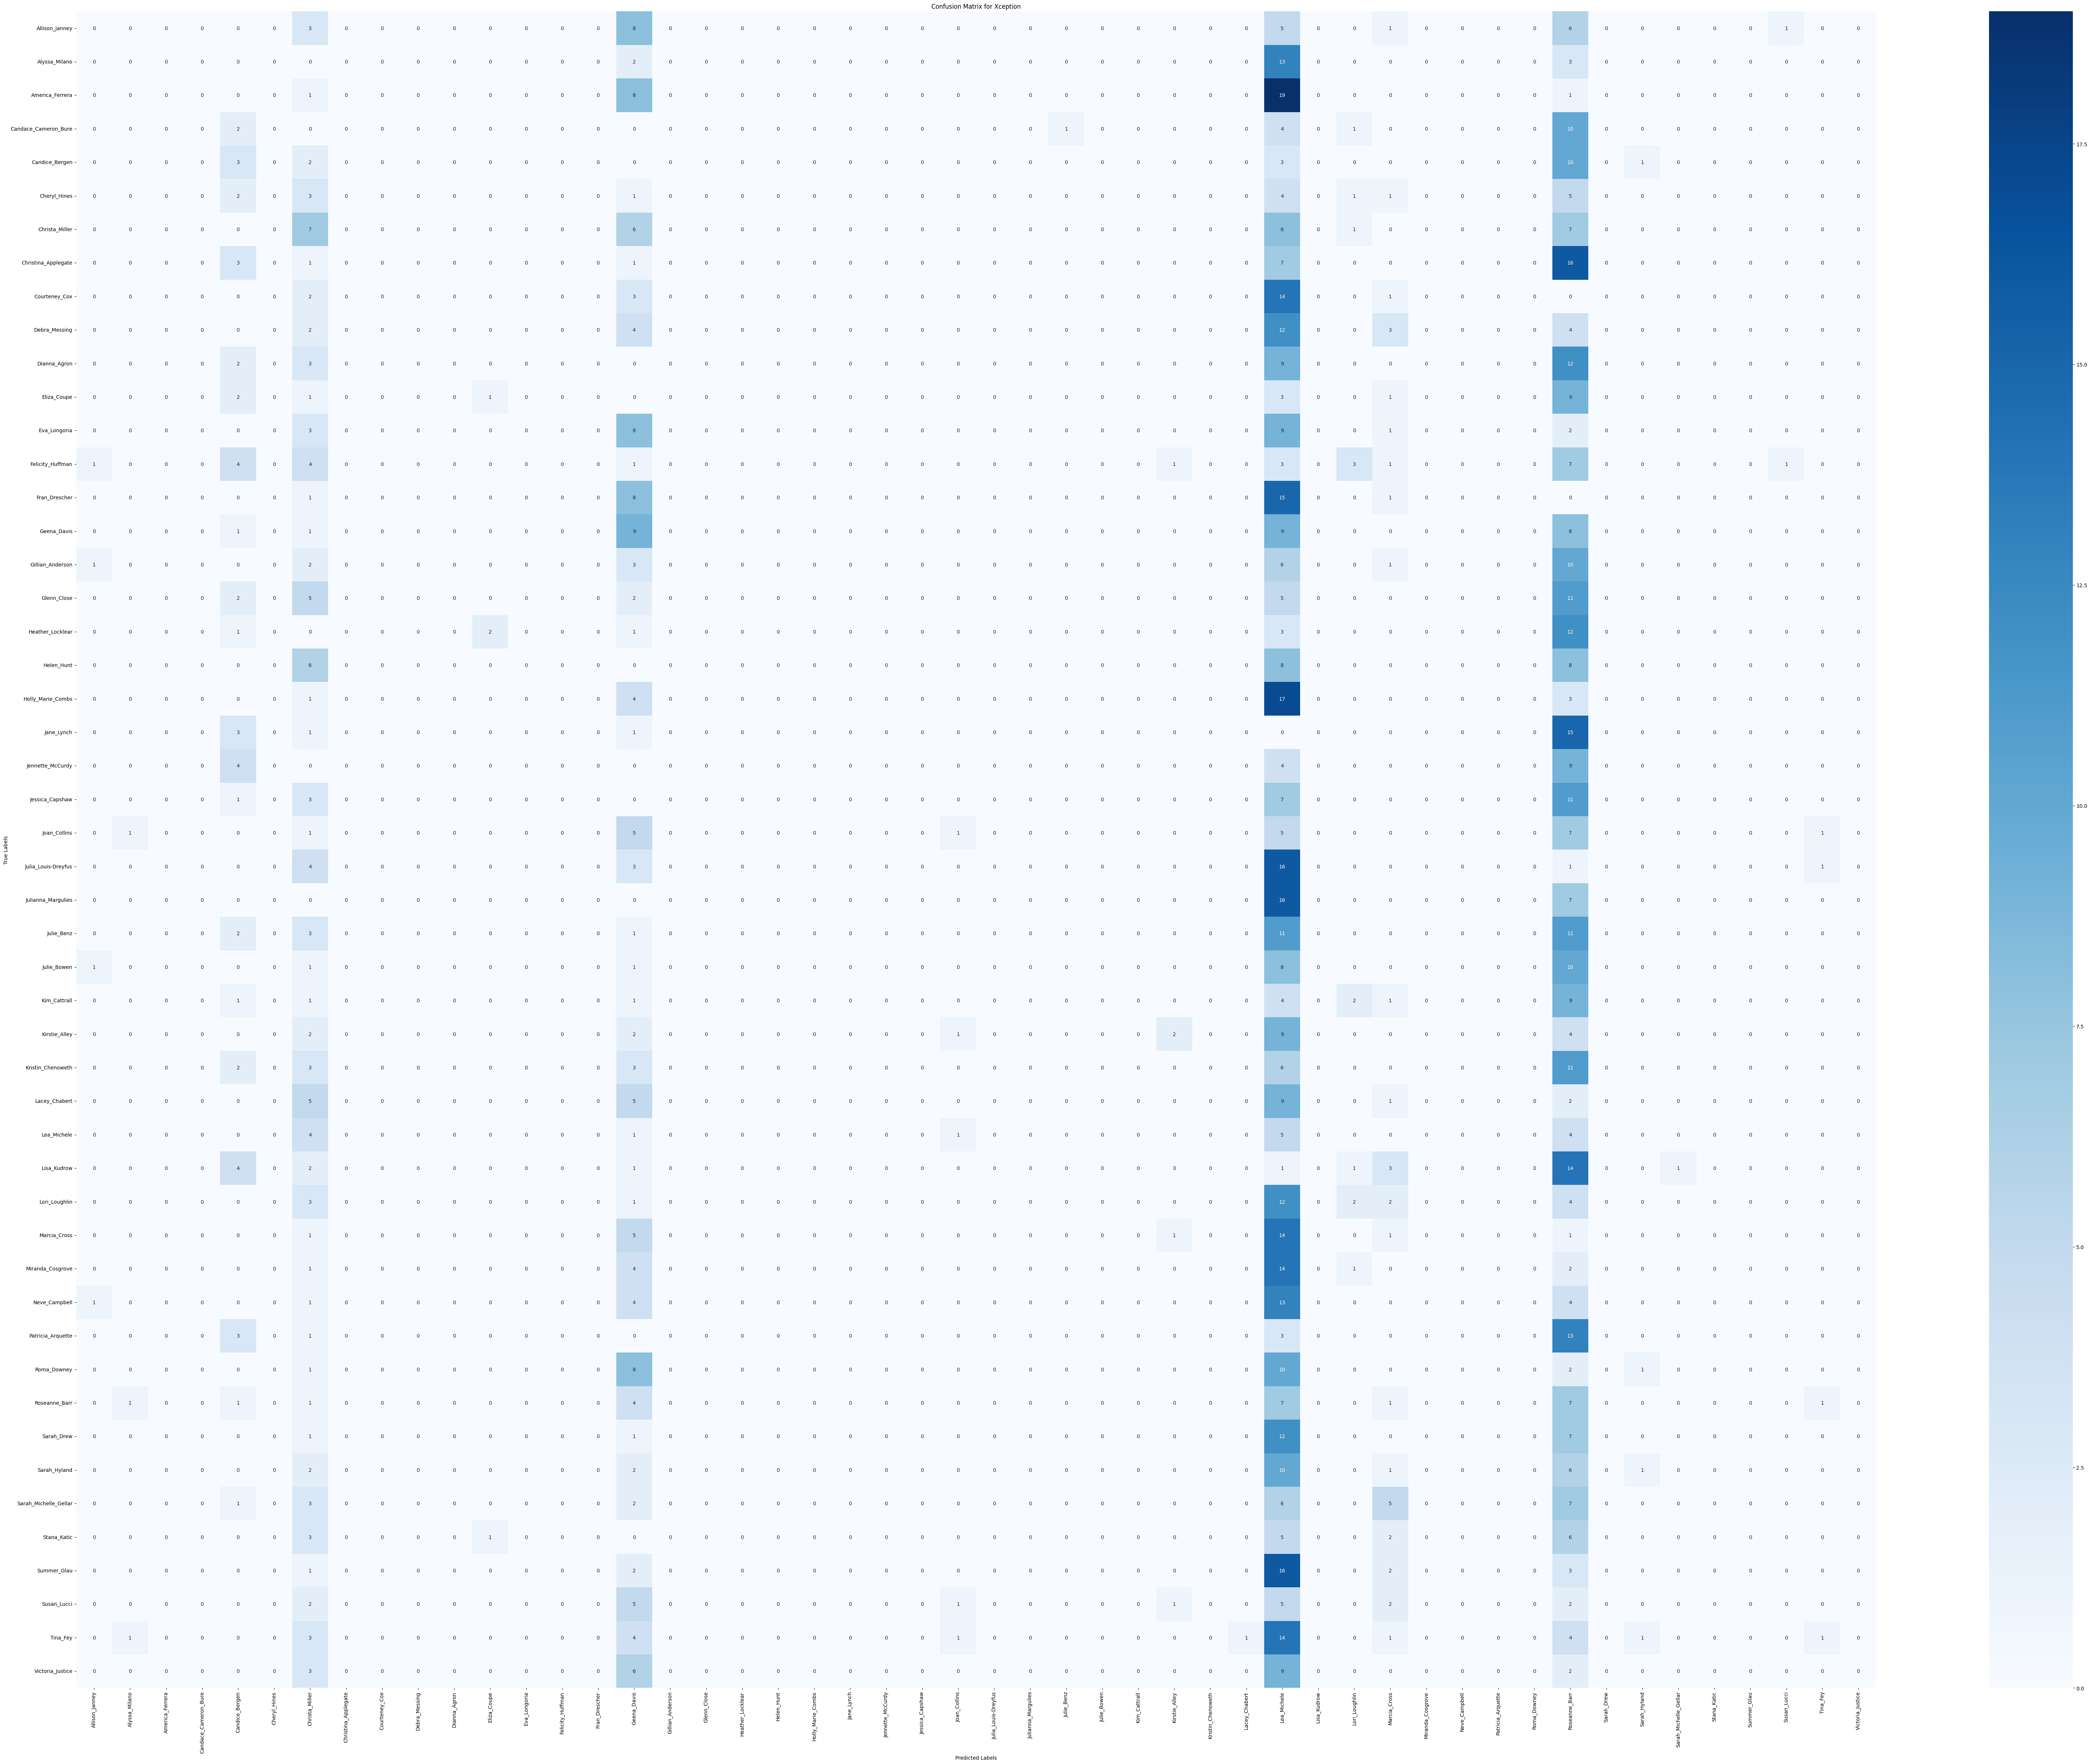

In [83]:
cm = confusion_matrix(y_true_classes_resnet, y_pred_classes_resnet)

# رسم confusion matrix باستخدام seaborn
plt.figure(figsize=(80, 60))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title(f"Confusion Matrix for {name}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, F1-Score
precision = precision_score(y_true_classes_resnet, y_pred_classes_resnet, average='weighted')
recall = recall_score(y_true_classes_resnet, y_pred_classes_resnet, average='weighted')
f1 = f1_score(y_true_classes_resnet, y_pred_classes_resnet, average='weighted')

print("ResNet Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

ResNet Metrics:
Precision: 0.04
Recall: 0.04
F1-Score: 0.02


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


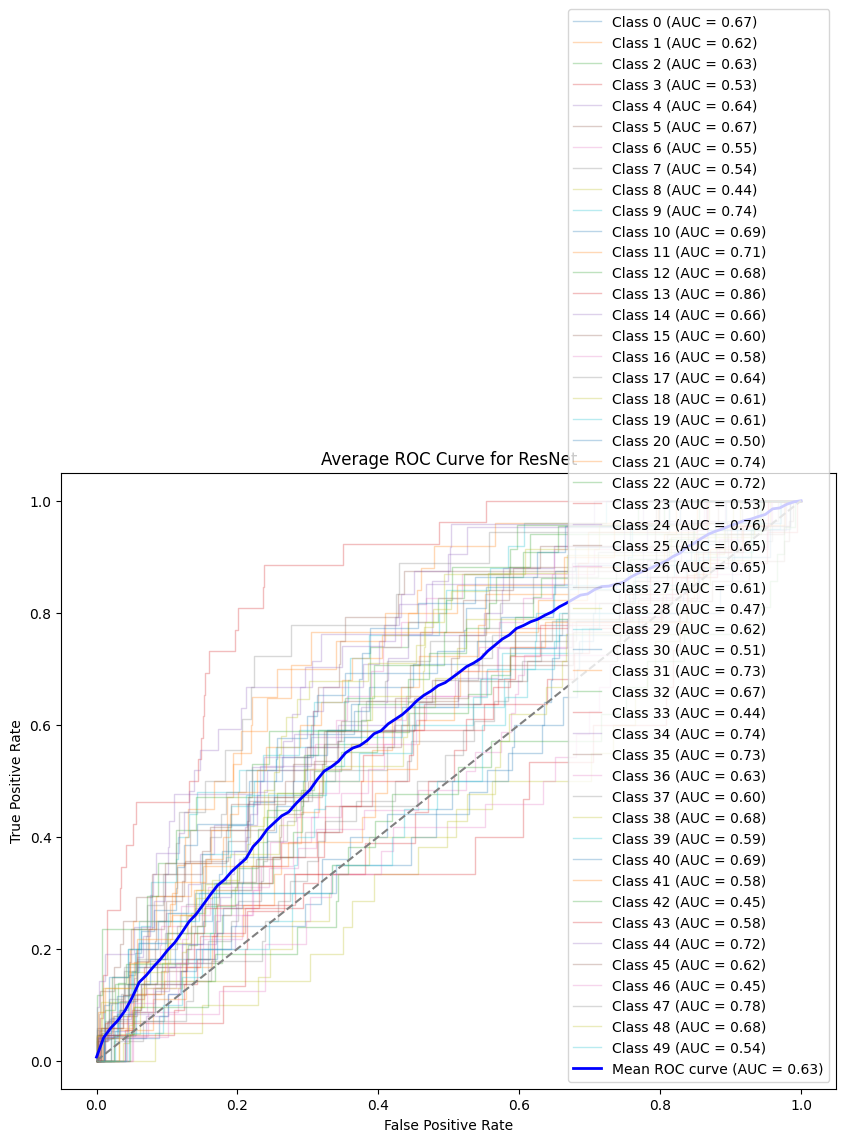

In [85]:
n_classes_resnet = all_labels_resnet.shape[1]  # number of classes
y_true_bin_resnet = label_binarize(y_true_classes_resnet, classes=np.arange(n_classes_resnet))
y_pred_bin_resnet = y_pred_resnet  # The raw prediction probabilities from ResNet

# Initialize variables to store FPR, TPR, and AUC for each class
fpr_all_resnet = []
tpr_all_resnet = []
roc_auc_all_resnet = []

# Compute ROC curve and AUC for each class
for i in range(n_classes_resnet):
    fpr, tpr, _ = roc_curve(y_true_bin_resnet[:, i], y_pred_bin_resnet[:, i])
    roc_auc = auc(fpr, tpr)
    fpr_all_resnet.append(fpr)
    tpr_all_resnet.append(tpr)
    roc_auc_all_resnet.append(roc_auc)

# Calculate the mean ROC curve
# First, interpolate the TPR at common FPR points
mean_fpr_resnet = np.linspace(0, 1, 100)
mean_tpr_resnet = np.zeros_like(mean_fpr_resnet)

for i in range(n_classes_resnet):
    mean_tpr_resnet += np.interp(mean_fpr_resnet, fpr_all_resnet[i], tpr_all_resnet[i])

mean_tpr_resnet /= n_classes_resnet

# Calculate the AUC for the average ROC curve
mean_roc_auc_resnet = auc(mean_fpr_resnet, mean_tpr_resnet)

# Plotting the ROC curves for each class and the average curve
plt.figure(figsize=(10, 8))

# Plot the individual class ROC curves
for i in range(n_classes_resnet):
    plt.plot(fpr_all_resnet[i], tpr_all_resnet[i], lw=1, alpha=0.3, label=f'Class {i} (AUC = {roc_auc_all_resnet[i]:.2f})')

# Plot the average ROC curve
plt.plot(mean_fpr_resnet, mean_tpr_resnet, color='b', label=f'Mean ROC curve (AUC = {mean_roc_auc_resnet:.2f})', lw=2)

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customizing the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve for ResNet')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [12]:
print("Training densenet...")
densenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

# تقييم ResNet
densenet_loss, densenet_acc = densenet_model.evaluate(val_generator)
print(f"densenet Accuracy: {densenet_acc:.2f}")


Training densenet...
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.0841 - loss: 3.8419
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step - accuracy: 0.2969 - loss: 2.8278
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.3295 - loss: 2.5285
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 272us/step - accuracy: 0.3750 - loss: 2.2225
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4934 - loss: 1.8670
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 244us/step - accuracy: 0.5000 - loss: 1.6906
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.5570 - loss: 1.5765
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 241us/step - accuracy: 0.6719 - loss: 1.2069
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.6289 - loss: 1.3072
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 299us/step - accuracy: 0.6250 - loss: 1.3232
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5315 - loss: 1.6530
densenet Accuracy: 0.57


In [13]:
print(f"Evaluating DenseNet ...")

all_imgs_densenet = []
all_labels_densenet = []

# Assuming `val_generator` is your data generator
for i in range(len(val_generator)):
    imgs_densenet, labels_densenet = next(val_generator)
    all_imgs_densenet.append(imgs_densenet)
    all_labels_densenet.append(labels_densenet)

# Convert the lists to arrays
all_imgs_densenet = np.vstack(all_imgs_densenet)
all_labels_densenet = np.vstack(all_labels_densenet)

# Assuming `densenet_model` is your DenseNet model
y_pred_densenet = densenet_model.predict(all_imgs_densenet)

# Convert predictions to classes
y_pred_classes_densenet = np.argmax(y_pred_densenet, axis=1)
y_true_classes_densenet = np.argmax(all_labels_densenet, axis=1)

# Display the results
print("Predicted Classes (DenseNet):", y_pred_classes_densenet[:10])
print("True Classes (DenseNet):", y_true_classes_densenet[:10])


Evaluating DenseNet ...
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 837ms/step
Predicted Classes (DenseNet): [37 13 32 14 43 36  5 16 49  1]
True Classes (DenseNet): [37 13 32 14 43 36  5 16  1 10]


In [14]:
from sklearn.metrics import accuracy_score

# حساب الدقة
accuracy_densenet = accuracy_score(y_true_classes_densenet, y_pred_classes_densenet)
print(f"Accuracy (DenseNet): {accuracy_densenet:.2f}")

Accuracy (DenseNet): 0.57


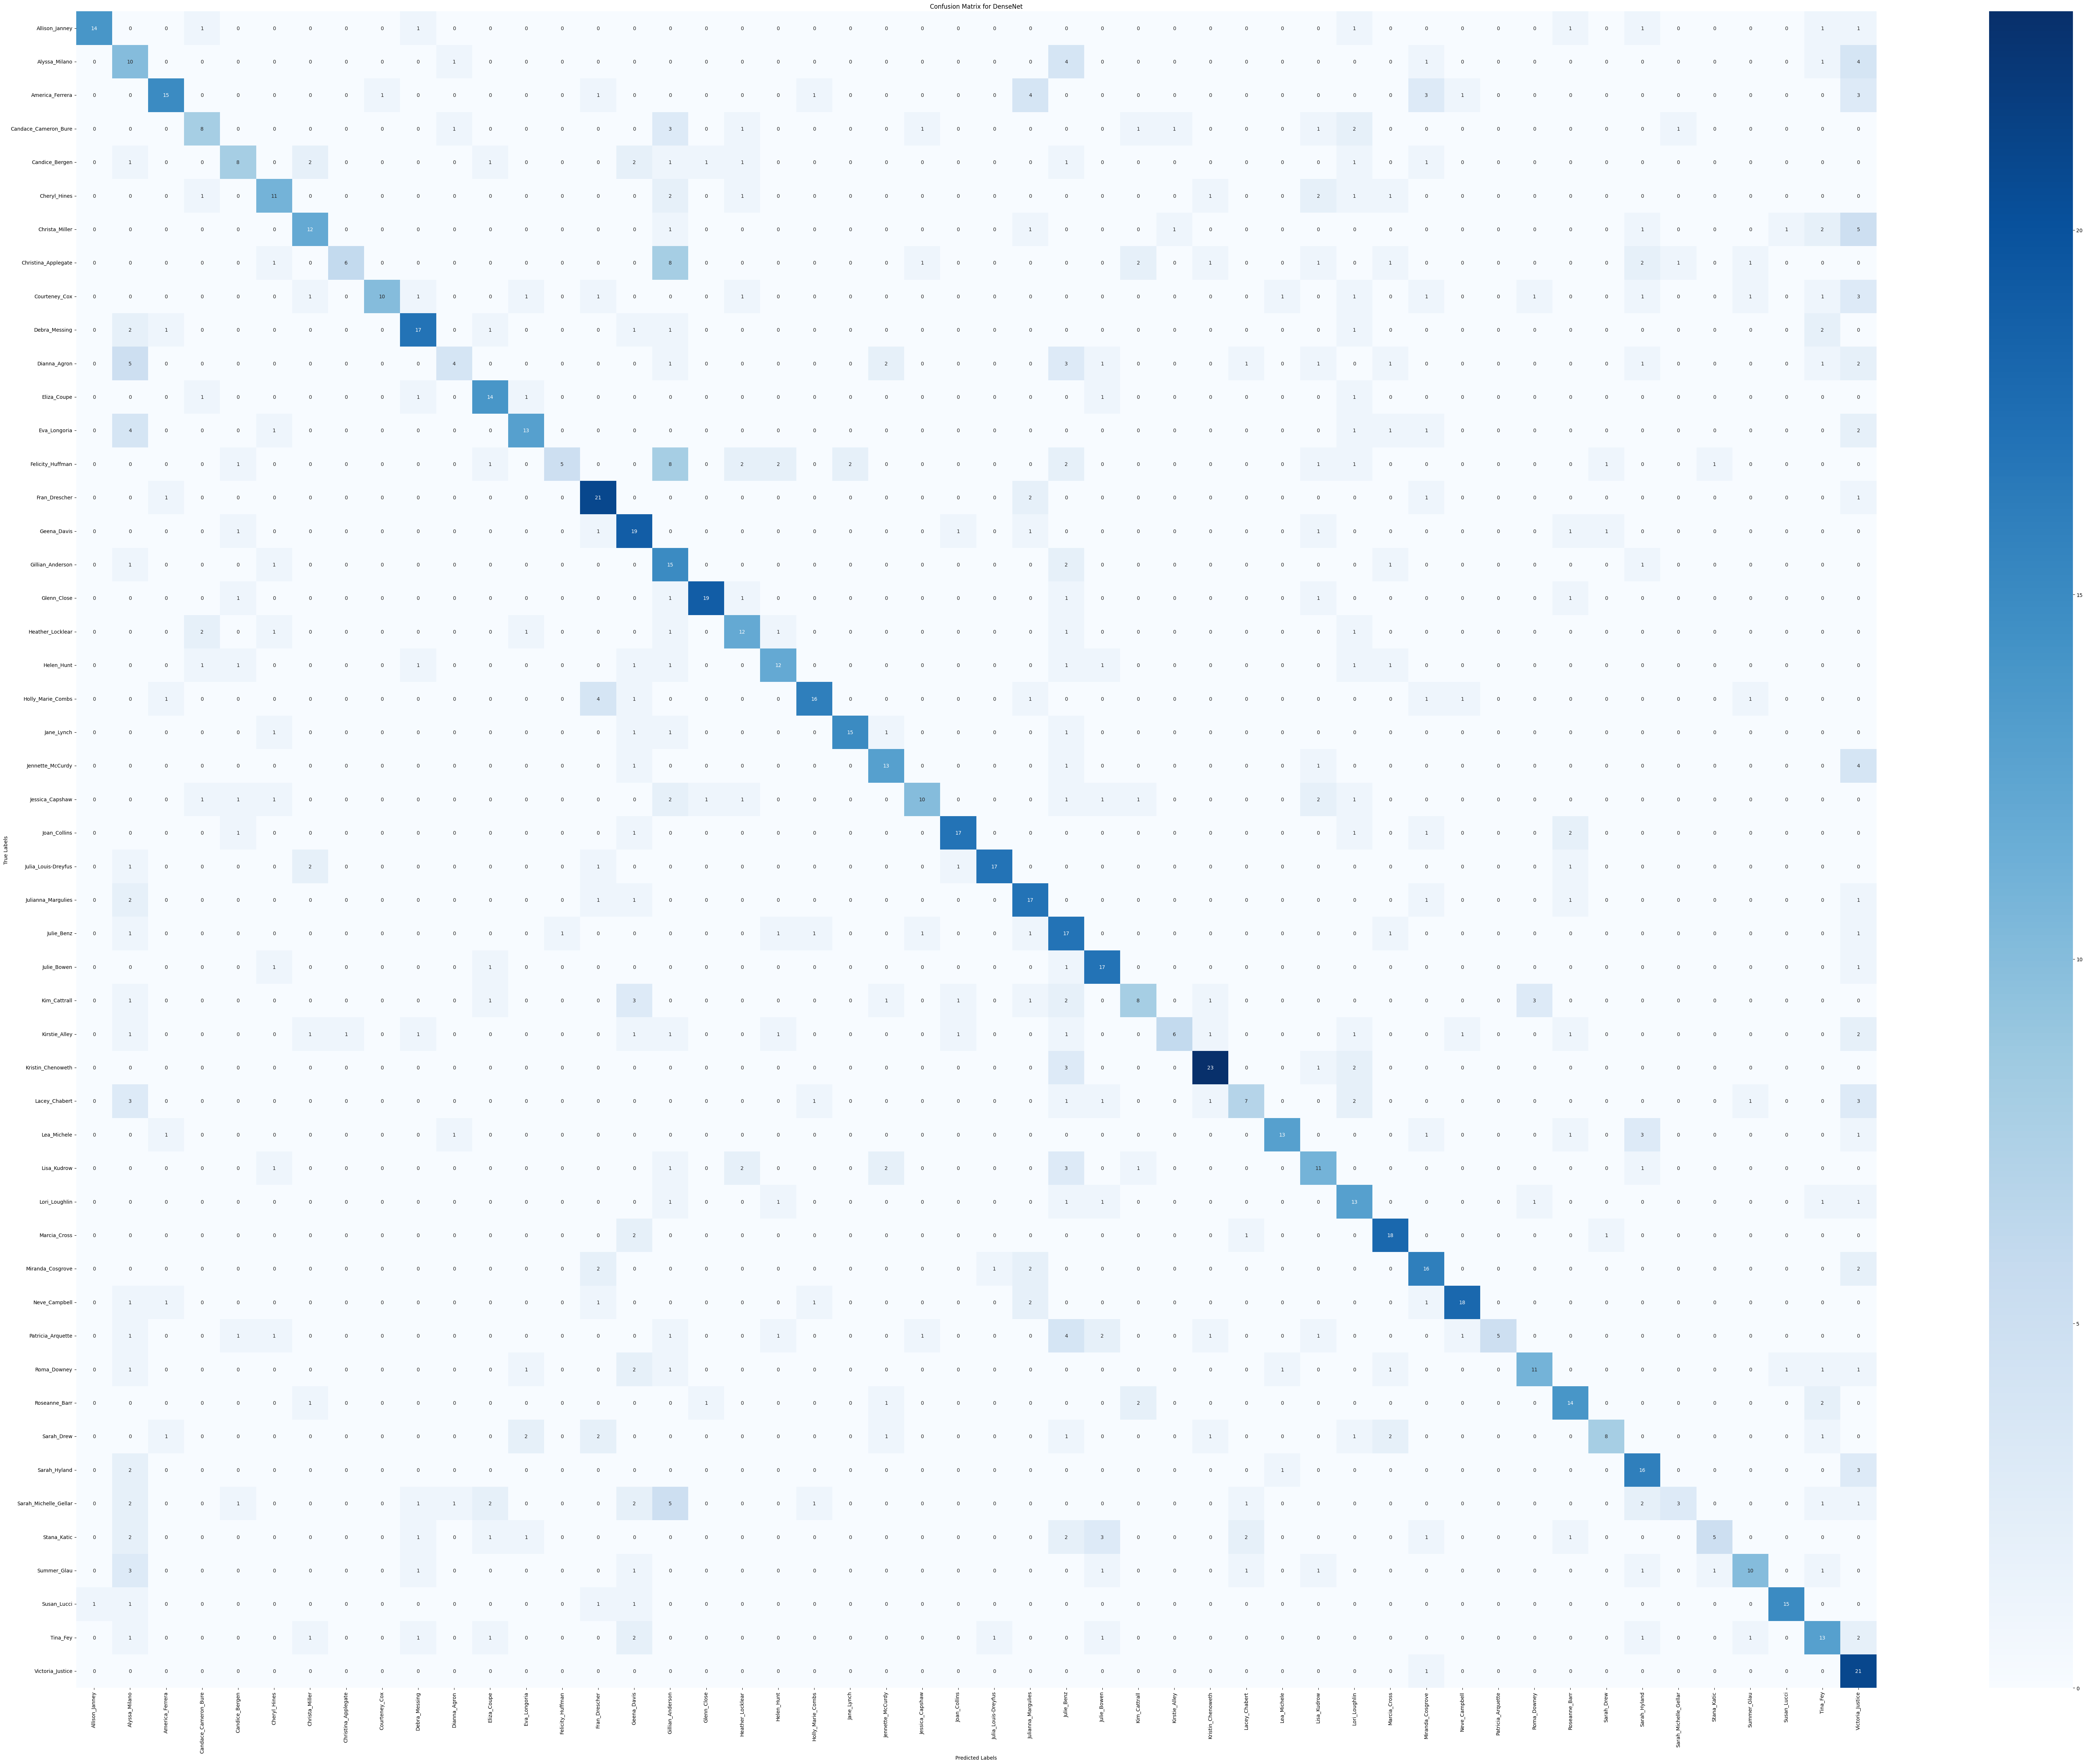

In [16]:
cm_densenet = confusion_matrix(y_true_classes_densenet, y_pred_classes_densenet)

# رسم confusion matrix باستخدام seaborn
plt.figure(figsize=(80, 60))  # Adjust the figure size for better readability
sns.heatmap(cm_densenet, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title(f"Confusion Matrix for DenseNet")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, F1-Score
precision = precision_score(y_true_classes_densenet, y_pred_classes_densenet, average='weighted')
recall = recall_score(y_true_classes_densenet, y_pred_classes_densenet, average='weighted')
f1 = f1_score(y_true_classes_densenet, y_pred_classes_densenet, average='weighted')

print("densenet Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

densenet Metrics:
Precision: 0.64
Recall: 0.57
F1-Score: 0.56


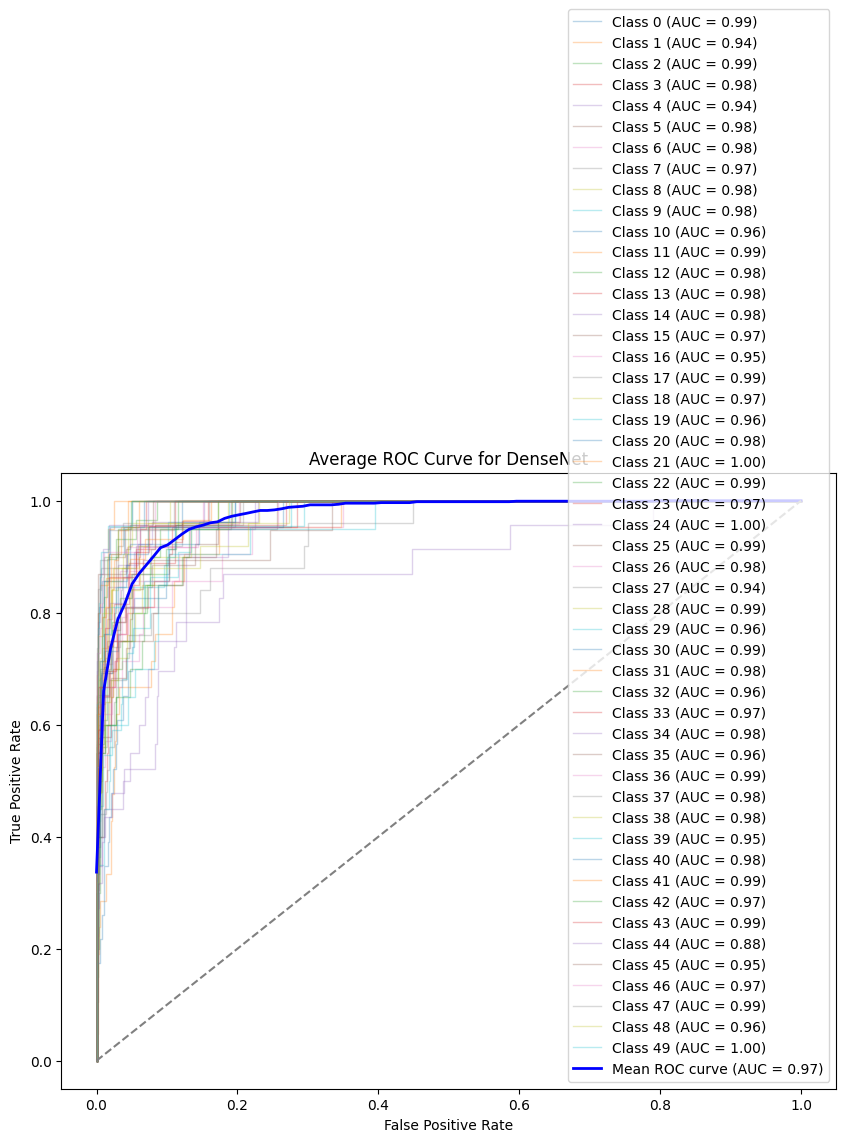

In [19]:
from sklearn.preprocessing import label_binarize
n_classes_densenet = all_labels_densenet.shape[1]  # Number of classes
y_true_bin_densenet = label_binarize(y_true_classes_densenet, classes=np.arange(n_classes_densenet))
y_pred_bin_densenet = y_pred_densenet  # The raw prediction probabilities from DenseNet

# Initialize variables to store FPR, TPR, and AUC for each class
fpr_all_densenet = []
tpr_all_densenet = []
roc_auc_all_densenet = []

# Compute ROC curve and AUC for each class
for i in range(n_classes_densenet):
    fpr, tpr, _ = roc_curve(y_true_bin_densenet[:, i], y_pred_bin_densenet[:, i])
    roc_auc = auc(fpr, tpr)
    fpr_all_densenet.append(fpr)
    tpr_all_densenet.append(tpr)
    roc_auc_all_densenet.append(roc_auc)

# Calculate the mean ROC curve
# First, interpolate the TPR at common FPR points
mean_fpr_densenet = np.linspace(0, 1, 100)
mean_tpr_densenet = np.zeros_like(mean_fpr_densenet)

for i in range(n_classes_densenet):
    mean_tpr_densenet += np.interp(mean_fpr_densenet, fpr_all_densenet[i], tpr_all_densenet[i])

mean_tpr_densenet /= n_classes_densenet

# Calculate the AUC for the average ROC curve
mean_roc_auc_densenet = auc(mean_fpr_densenet, mean_tpr_densenet)

# Plotting the ROC curves for each class and the average curve
plt.figure(figsize=(10, 8))

# Plot the individual class ROC curves
for i in range(n_classes_densenet):
    plt.plot(fpr_all_densenet[i], tpr_all_densenet[i], lw=1, alpha=0.3, label=f'Class {i} (AUC = {roc_auc_all_densenet[i]:.2f})')

# Plot the average ROC curve
plt.plot(mean_fpr_densenet, mean_tpr_densenet, color='b', label=f'Mean ROC curve (AUC = {mean_roc_auc_densenet:.2f})', lw=2)

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customizing the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average ROC Curve for DenseNet')
plt.legend(loc='lower right')

# Show the plot
plt.show()
